In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='paper',style='white', font='sans-serif', font_scale=3, color_codes=True)#, rc={'figure.figsize':(10.0,10.0)})

In [2]:
ga_outcomes=pd.read_pickle('../data/GA_pickled/ga_outcomes_full_data.pkl')


In [3]:
ga_outcomes.per_capita_income=ga_outcomes.per_capita_income.astype(int)

In [ ]:
summary=ga_outcomes.drop(['COUNTY','SCHOOL_DSTRCT_NM', 'TEST_CMPNT_TYP_NM','EXAM_COUNT','EXAMS_3_OR_ABOVE','Year','Latitude','Longitude','Year'],axis=1).describe().T
summary

,count,mean,std,min,25%,50%,75%,max
PERCENT_3_OR_ABOVE,536.0,45.730887,19.633132,1.234568,33.126451,47.831452,59.357697,9.411765e+01
population,536.0,91603.662313,170316.734367,4565.000000,19975.000000,33405.000000,93641.000000,1.061944e+06
closest_five_r1r2_avg,536.0,111.503756,44.748884,12.958670,74.933534,107.169815,156.362155,1.905490e+02
closest_five_public_avg,536.0,46.214935,13.761259,9.013480,37.349519,45.544418,55.155144,8.115865e+01
closest_five_private_nfp_avg,536.0,73.400021,35.915575,6.913755,43.397188,67.226927,104.656285,1.439433e+02
closest_five_landgrant_avg,536.0,175.727408,32.653258,135.919142,150.255623,167.228854,187.465410,2.710384e+02
closest_five_stem_avg,536.0,121.906837,52.252772,27.635967,80.324044,109.609138,162.654509,2.434398e+02
closest_five_avg_enrollment_r1r2,536.0,27975.350000,3901.175682,21115.600000,24348.800000,29515.600000,29745.000000,3.747860e+04
closest_five_avg_enrollment_public,536.0,11248.241045,5832.077233,4051.200000,6876.400000,9207.600000,16275.400000,3.370420e+04
closest_five_avg_enrollment_private_nfp,536.0,2411.005224,1170.345704,579.600000,1700.800000,2367.400000,2807.600000,6.151800e+03


In [ ]:
# Open street heat map showing ap pass rate by school district in Wisconsin. Also, save the figure as a pickle file.

fig = px.density_mapbox(ga_outcomes.loc[ga_outcomes['Year']==2022], lat='Latitude', lon='Longitude', z='PERCENT_3_OR_ABOVE', radius=10,
                        center=dict(lat= 33, lon= -83), zoom=5,
                        mapbox_style="open-street-map")
fig.update_layout(
    title='2022-23: AP Scores 3-5 by Georgia County'
)

fig.show()
# with open('../data/GA_pickled/2022_GA_pass_by_county.pkl', 'wb') as f:
#     pkl.dump(fig, f)

In [5]:
# Features are obtained from georga_models
features=['population',
 'per_capita_income',
 'closest_five_r1r2_avg',
 'closest_five_public_avg',
 'closest_five_private_nfp_avg',
 'closest_five_landgrant_avg',
 'closest_five_stem_avg',
 'closest_five_avg_enrollment_r1r2',
 'closest_five_avg_enrollment_public',
 'closest_five_avg_enrollment_private_nfp',
 'closest_five_avg_enrollment_landgrant',
 'closest_five_avg_enrollment_stem',
 'closest_five_avg_dormrooms_r1r2',
 'closest_five_avg_dormrooms_public',
 'closest_five_avg_dormrooms_private_nfp',
 'closest_five_avg_dormrooms_landgrant',
 'closest_five_avg_dormrooms_stem']

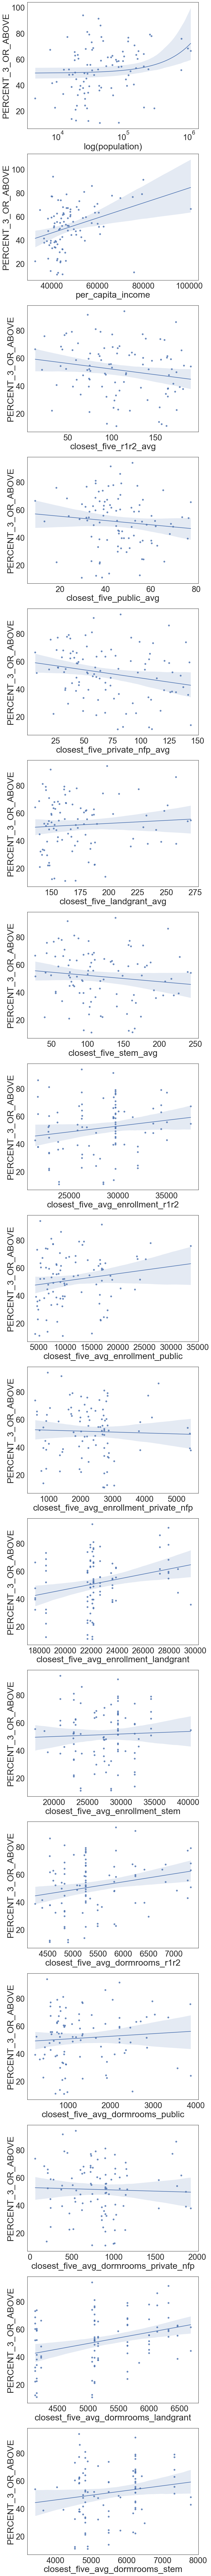

In [ ]:
plotdata=ga_outcomes.loc[ga_outcomes['Year']==2022]
fig,axes=plt.subplots(len(features),1,figsize=(10,150))
for i,feature in enumerate(features):
        sns.regplot(data=plotdata,x=feature,y='PERCENT_3_OR_ABOVE',ax=axes[i])
        if feature=='population':
                axes[i].set_xscale('log')
                axes[i].set_xlabel('log(population)')
# plt.savefig('../Georgia/feature_regplots.png',dpi=300) #must be cropped after


Using plotly, the key features by shape have been saved for nicer visualization.

In [ ]:
shap_features=['per_capita_income','population',
   'closest_five_avg_dormrooms_landgrant',
             'closest_five_landgrant_avg',
           'closest_five_private_nfp_avg',
     'closest_five_avg_enrollment_public']

for feature in shap_features:
    fig = px.scatter(data_frame=plotdata,x=feature, y='PERCENT_3_OR_ABOVE',trendline='lowess',trendline_color_override='darkblue',width=800, height=600,color='PERCENT_3_OR_ABOVE',
                 title=f'Pass rate vs {feature} 2022-23')
    fig.show()
    # with open(f'../data/GA_pickled/WI_AP_pass_rate_by_counties_{feature}.pkl', 'wb') as f:
    #     pkl.dump(fig, f)